In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPRegressor


import warnings
warnings.filterwarnings('ignore')

In [46]:
diet_data = pd.read_csv('datasets/diet_data.csv')
diet_data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [47]:
diet_data.sample(frac = 1).reset_index(drop = True).head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,11/4/2018,12.0,1.0,4.0,2708.0,5200.0,1.92,0.0,0.0,0.0,0.0,0.0,0.0,32.0
1,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0
2,10/21/2018,12.0,0.0,6.0,2694.0,4300.0,1.60,0.0,1.0,1.0,0.0,0.0,0.0,-2.0
3,10/27/2018,12.0,1.0,0.0,2704.0,2950.0,1.09,0.0,0.0,1.0,1.0,0.0,0.0,-16.0
4,9/30/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
diet_data.shape

(151, 14)

In [49]:
diet_data[diet_data.isnull().any(axis = 1)].count()

Date           10
Stone           2
Pounds          2
Ounces          2
weight_oz       9
calories        0
cals_per_oz     7
five_donuts     0
walk            0
run             0
wine            0
prot            0
weight          0
change          7
dtype: int64

In [50]:
diet_data = diet_data.dropna()

In [51]:
diet_data[diet_data.isnull().any(axis = 1)].count()

Date           0
Stone          0
Pounds         0
Ounces         0
weight_oz      0
calories       0
cals_per_oz    0
five_donuts    0
walk           0
run            0
wine           0
prot           0
weight         0
change         0
dtype: int64

In [52]:
diet_data.shape

(140, 14)

In [53]:
diet_data.describe()

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,11.542857,6.157143,3.585714,2687.700000,3180.714286,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-1.485714
std,0.499949,5.664824,2.913589,28.663189,1478.753433,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,25.098793
min,11.000000,0.000000,0.000000,2628.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.000000
25%,11.000000,1.000000,0.000000,2670.000000,2187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,12.000000,3.000000,4.000000,2689.000000,2575.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
75%,12.000000,12.000000,6.000000,2704.000000,3850.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,16.000000
max,12.000000,13.000000,8.000000,2768.000000,9150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


Text(0, 0.5, 'change in weight')

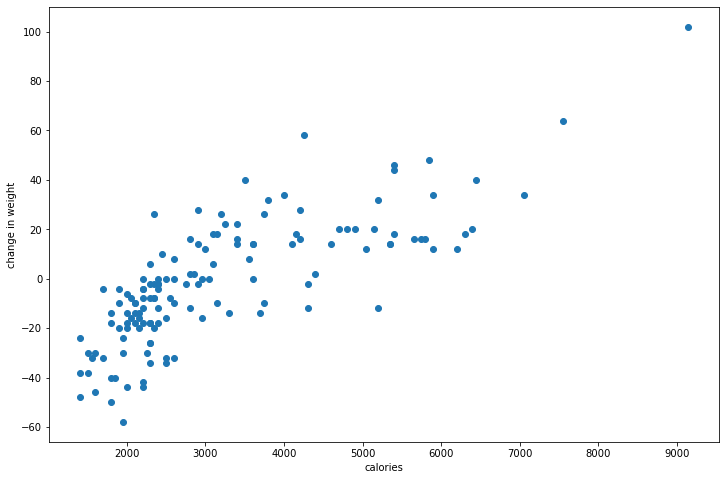

In [54]:
fig, ax = plt.subplots(figsize =(12, 8))

plt.scatter(diet_data['calories'], diet_data['change'])

plt.xlabel('calories')
plt.ylabel('change in weight')

Text(0, 0.5, 'change in weight')

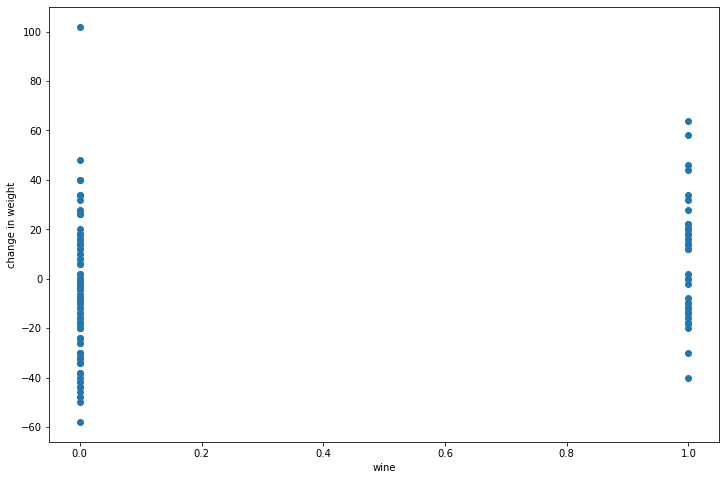

In [55]:
fig, ax = plt.subplots(figsize =(12, 8))

plt.scatter(diet_data['wine'], diet_data['change'])

plt.xlabel('wine')
plt.ylabel('change in weight')

In [56]:
diet_data_corr = diet_data.corr()

diet_data_corr

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
Stone,1.000000,-0.980384,-0.190219,0.787595,0.002099,0.052567,-0.109649,-0.033113,-0.072821,-0.133707,0.009897,-0.286142
Pounds,-0.980384,1.000000,0.157404,-0.652264,-0.030854,-0.029257,0.122125,0.054065,0.030841,0.135703,0.010845,0.214880
Ounces,-0.190219,0.157404,1.000000,-0.143811,-0.012220,0.007856,0.049295,-0.031251,0.041677,0.040839,0.008350,0.123744
weight_oz,0.787595,-0.652264,-0.143811,1.000000,-0.090605,0.113664,-0.037218,0.038408,-0.182756,-0.089135,0.073811,-0.425912
calories,0.002099,-0.030854,-0.012220,-0.090605,1.000000,-0.239251,-0.434065,0.000840,0.270376,0.073819,0.123413,0.773989
five_donuts,0.052567,-0.029257,0.007856,0.113664,-0.239251,1.000000,0.275835,-0.136558,-0.159311,-0.281215,-0.149653,-0.214417
walk,-0.109649,0.122125,0.049295,-0.037218,-0.434065,0.275835,1.000000,-0.132453,-0.072229,0.201095,0.059382,-0.384581
run,-0.033113,0.054065,-0.031251,0.038408,0.000840,-0.136558,-0.132453,1.000000,-0.062577,-0.053838,0.249068,-0.150387
wine,-0.072821,0.030841,0.041677,-0.182756,0.270376,-0.159311,-0.072229,-0.062577,1.000000,-0.027434,-0.063680,0.215387
prot,-0.133707,0.135703,0.040839,-0.089135,0.073819,-0.281215,0.201095,-0.053838,-0.027434,1.000000,0.522965,0.035156


<AxesSubplot:>

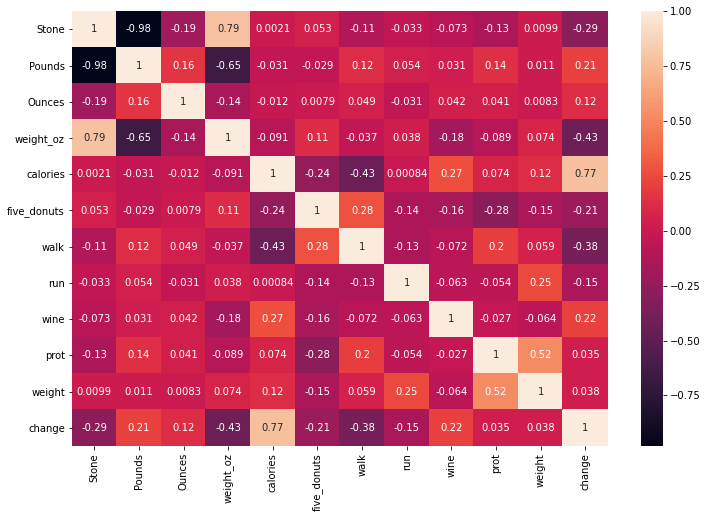

In [57]:
fig, ax = plt.subplots(figsize =(12, 8))

sns.heatmap(diet_data_corr, annot = True)

In [58]:
x = diet_data.drop(['change', 'Date', 'Stone', 'Pounds', 'Ounces'], axis = 1)
y = diet_data['change']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [59]:
scaler =StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [60]:
mlp_reg = MLPRegressor(activation ='relu',
                       hidden_layer_sizes =(1, ),
                       solver = 'lbfgs',
                       verbose = True,
                       max_iter = 100 
                        )

In [61]:
mlp_reg.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(1,), max_iter=100, solver='lbfgs',
             verbose=True)

In [64]:
y_pred = mlp_reg.predict(x_test)

In [65]:
mlp_reg.score(x_train, y_train)

0.7333030078718699

In [66]:
r2_score(y_test, y_pred)

0.6126252675771817

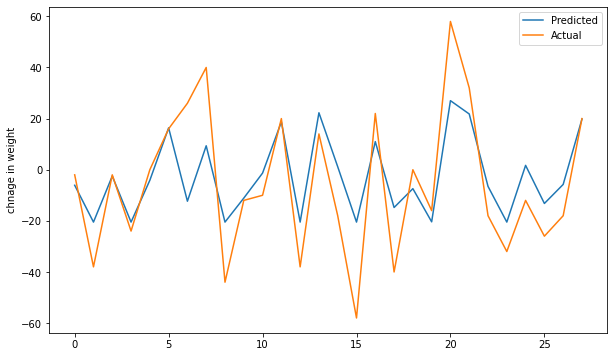

In [68]:
fig, ax = plt.subplots(figsize =(10, 6))

plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label = 'Actual')

plt.ylabel('chnage in weight')

plt.legend()

Training Score:  0.8716486706110419
Test Score:  0.6802414762830915


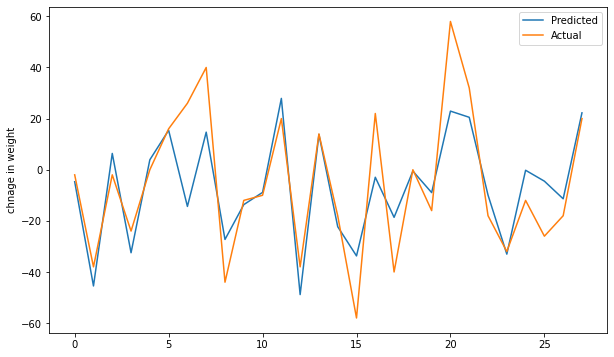

In [70]:
mlp_reg = MLPRegressor(activation ='relu',
                       hidden_layer_sizes =(5, ),
                       solver = 'lbfgs',
                       verbose = True,
                       max_iter = 100 
                        )
mlp_reg.fit(x_train, y_train)
y_pred = mlp_reg.predict(x_test)


print('Training Score: ', mlp_reg.score(x_train, y_train))
print('Test Score: ', r2_score(y_test, y_pred))



fig, ax = plt.subplots(figsize =(10, 6))

plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label = 'Actual')

plt.ylabel('chnage in weight')

plt.legend()

Training Score:  0.8305983191764938
Test Score:  0.7104714240974339


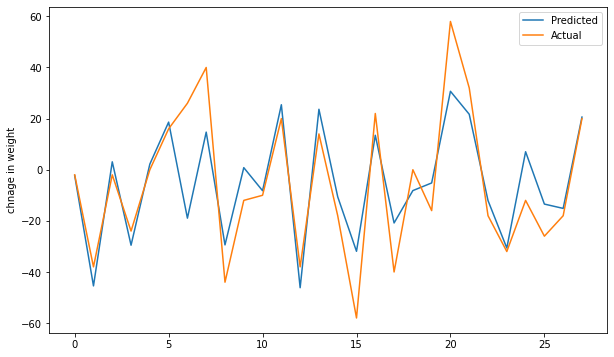

In [71]:
mlp_reg = MLPRegressor(activation ='relu',
                       hidden_layer_sizes =(2, 4),
                       solver = 'lbfgs',
                       verbose = True,
                       max_iter = 100 
                        )
mlp_reg.fit(x_train, y_train)
y_pred = mlp_reg.predict(x_test)


print('Training Score: ', mlp_reg.score(x_train, y_train))
print('Test Score: ', r2_score(y_test, y_pred))



fig, ax = plt.subplots(figsize =(10, 6))

plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label = 'Actual')

plt.ylabel('chnage in weight')

plt.legend()

Training Score:  0.688368874084162
Test Score:  0.5639576762916942


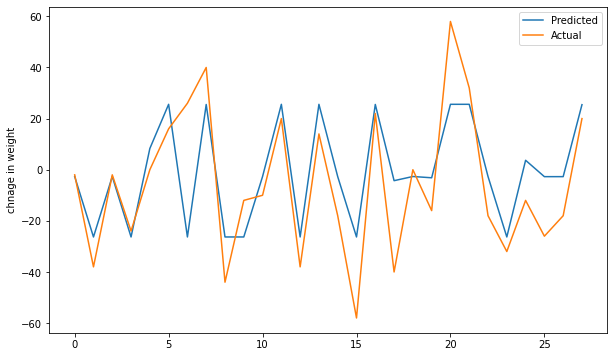

In [72]:
mlp_reg = MLPRegressor(activation ='logistic',
                       hidden_layer_sizes =(2, 4),
                       solver = 'lbfgs',
                       verbose = True,
                       max_iter = 100 
                        )
mlp_reg.fit(x_train, y_train)
y_pred = mlp_reg.predict(x_test)


print('Training Score: ', mlp_reg.score(x_train, y_train))
print('Test Score: ', r2_score(y_test, y_pred))



fig, ax = plt.subplots(figsize =(10, 6))

plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label = 'Actual')

plt.ylabel('chnage in weight')

plt.legend()

Training Score:  0.7276892847269678
Test Score:  0.5407297859908194


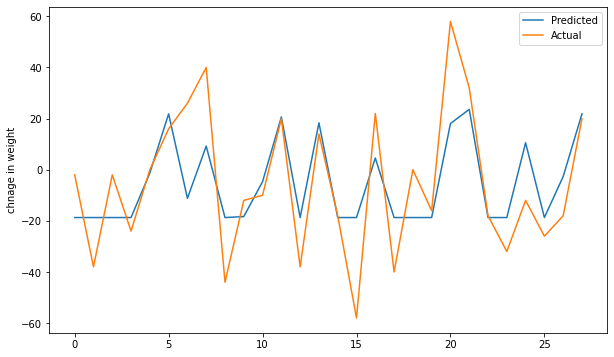

In [74]:
mlp_reg = MLPRegressor(activation ='relu',
                       hidden_layer_sizes =(2, 6, 4),
                       solver = 'lbfgs',
                       verbose = True,
                       max_iter = 100 
                        )
mlp_reg.fit(x_train, y_train)
y_pred = mlp_reg.predict(x_test)


print('Training Score: ', mlp_reg.score(x_train, y_train))
print('Test Score: ', r2_score(y_test, y_pred))



fig, ax = plt.subplots(figsize =(10, 6))

plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label = 'Actual')

plt.ylabel('chnage in weight')

plt.legend()